<a href="https://colab.research.google.com/github/NAMan00018/Final-project-mine/blob/main/cats_vs_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 58.4MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s] 


In [7]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#generators

In [10]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',#Will Give 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',#Will Give 0 to cat and 1 to dog
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [20]:
#create CNN model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [23]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.5154 - accuracy: 0.6079 - val_loss: 0.6103 - val_accuracy: 0.6848
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5559 - accuracy: 0.7148 - val_loss: 0.5462 - val_accuracy: 0.7364
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4903 - accuracy: 0.7628 - val_loss: 0.5657 - val_accuracy: 0.7246
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4188 - accuracy: 0.8043 - val_loss: 0.4962 - val_accuracy: 0.7710
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3575 - accuracy: 0.8435 - val_loss: 0.5159 - val_accuracy: 0.7636
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2919 - accuracy: 0.8724 - val_loss: 0.5129 - val_accuracy: 0.8070
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1954 - accuracy: 0.9193 - val_loss: 0.6933 - val_ac

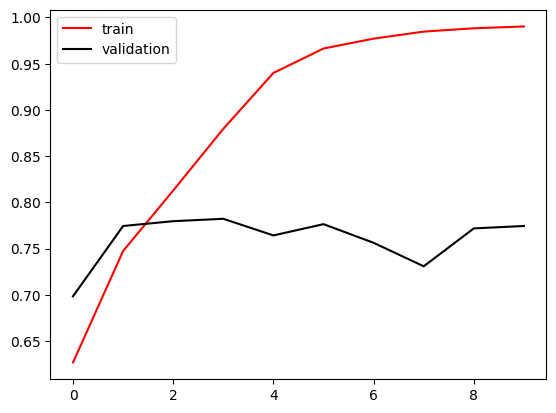

In [18]:
#before reduction of overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

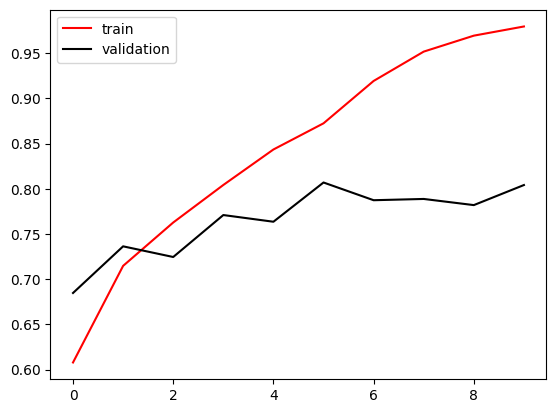

In [24]:
#After reduction of overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

In [47]:
import cv2

In [48]:
test_img=cv2.imread('/content/cat.jpeg')

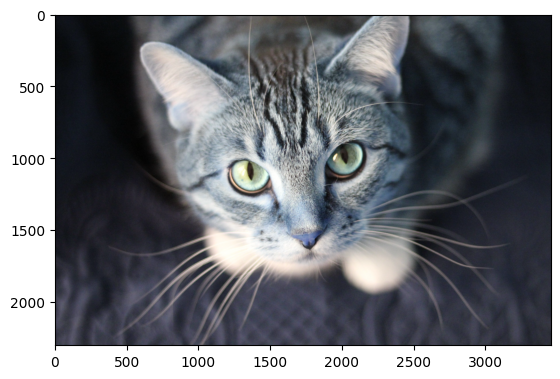

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(2304, 3456, 3)

In [51]:
test_img=cv2.resize(test_img,(256,256))

In [52]:
test_input=test_img.reshape((1,256,256,3))

In [53]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)